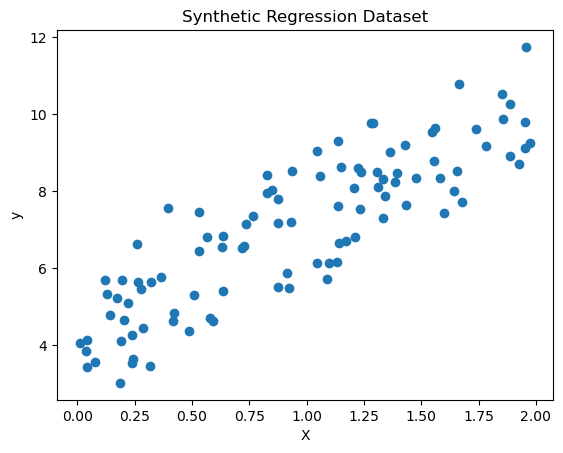

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the dataset
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Regression Dataset')
plt.show()

Epoch 0, Loss: 53.324591695089545
Epoch 100, Loss: 1.0929438591908858
Epoch 200, Loss: 1.0227127934595965
Epoch 300, Loss: 1.0011336539267983
Epoch 400, Loss: 0.9948601277239407
Epoch 500, Loss: 0.9931011188071796
Epoch 600, Loss: 0.99261813087541
Epoch 700, Loss: 0.9924870237653647
Epoch 800, Loss: 0.9924516515072077
Epoch 900, Loss: 0.9924421387847935


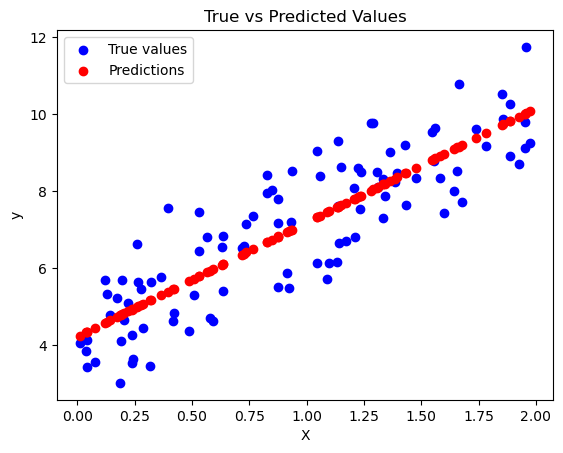

In [3]:
# Initialize parameters
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 1000

# Initialize weights and biases
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Forward propagation
def forward_propagation(X):
    global cache
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Output layer (linear activation for regression)
    cache = (A1, Z2)
    return A2

# Backward propagation
def backward_propagation(X, y, A2):
    global W1, b1, W2, b2
    m = X.shape[0]
    
    # Calculate gradients
    dA2 = A2 - y
    dW2 = np.dot(cache[0].T, dA2) / m
    db2 = np.sum(dA2, axis=0, keepdims=True) / m
    dA1 = np.dot(dA2, W2.T) * relu_derivative(cache[0])
    dW1 = np.dot(X.T, dA1) / m
    db1 = np.sum(dA1, axis=0, keepdims=True) / m
    
    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Training the model
for epoch in range(epochs):
    # Forward propagation
    A2 = forward_propagation(X)
    
    # Compute loss
    loss = mean_squared_error(y, A2)
    
    # Backward propagation
    backward_propagation(X, y, A2)
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Make predictions
y_pred = forward_propagation(X)

# Plot the predictions
plt.scatter(X, y, color='blue', label='True values')
plt.scatter(X, y_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()